# L8 Plot Matrices

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Let's say that we're interested in looking at the pairwise relationships between all of our numerical variables. Instead of plotting scatter plots one-by-one, we can inspect them all at once using something called a plot matrix.

Let's start by importing our fuel efficiency data set and get to work!

In [2]:
# load dataset
df = pd.read_csv('../../Data/fuel-econ.csv')

# create transmission type column
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

To  create a plot matrix, we will use Seaborns `PairGrid` function. If vars is not specified, then all numeric variables in the data frame will be put into the plot.

Note it takes a long time to generate if we use all variables!

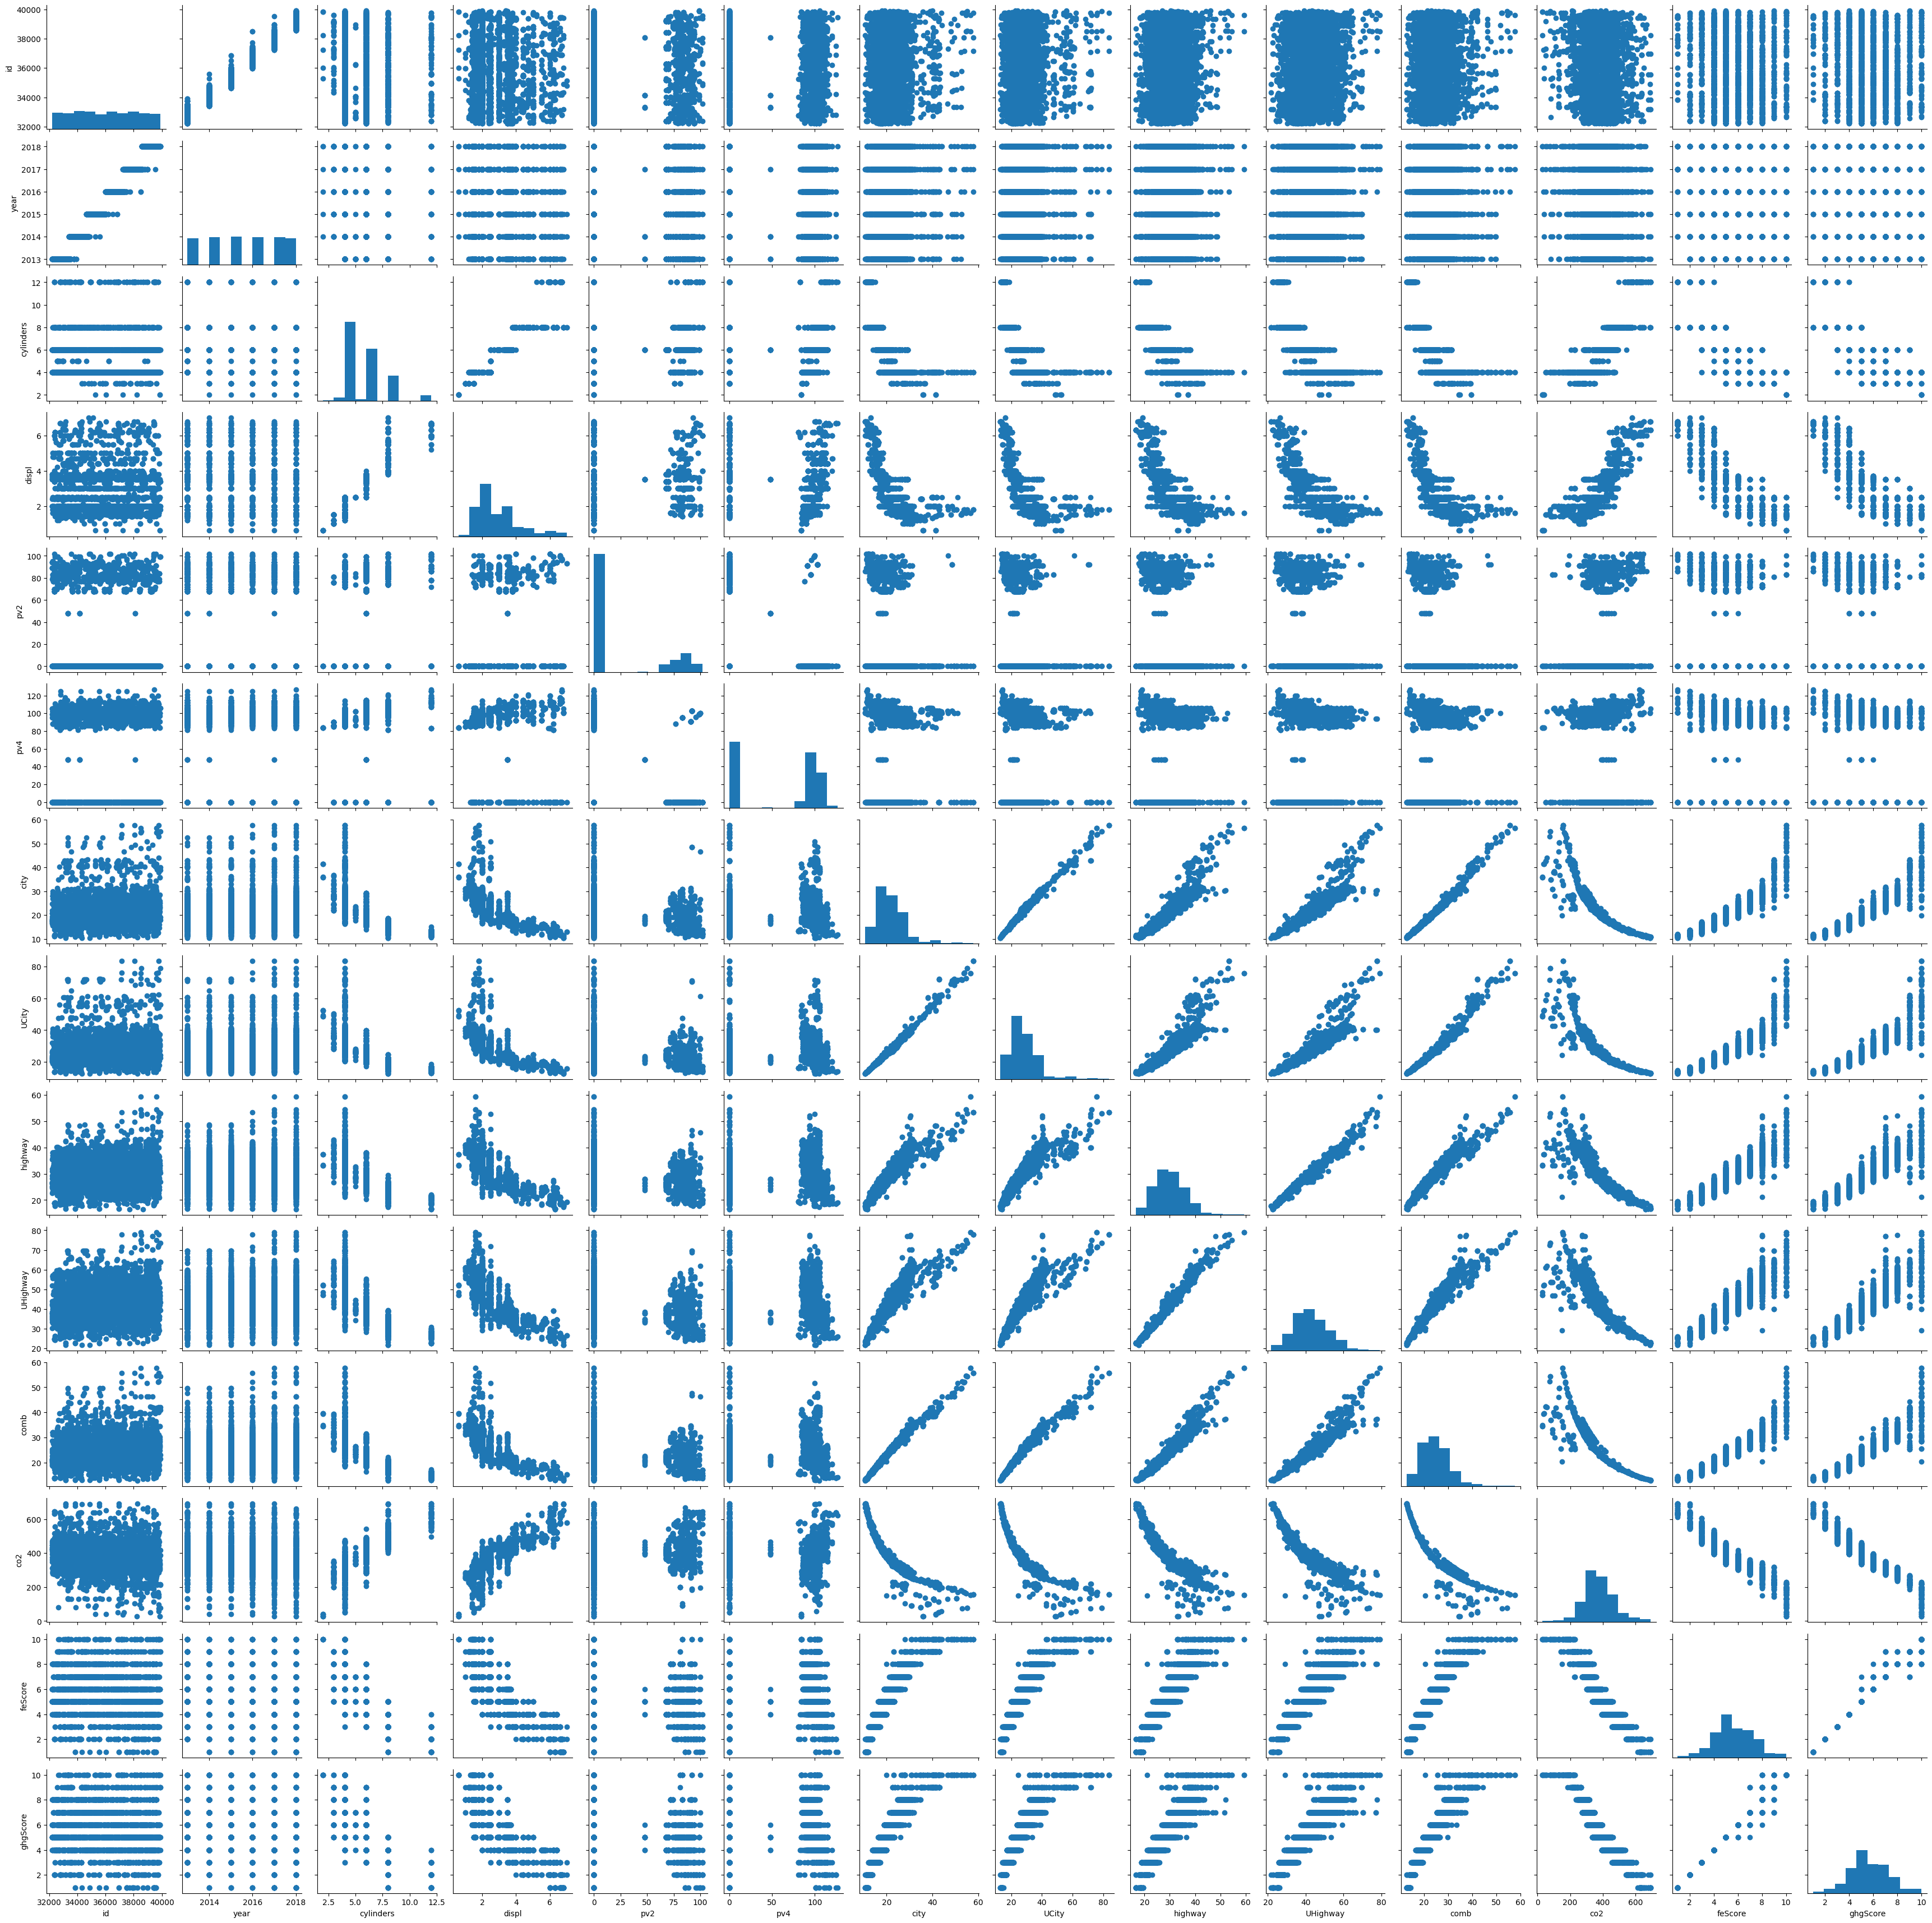

In [3]:
g = sns.PairGrid(data=df)
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

WHOA! That's a lot. Let's just focus on 4 specific variables here.

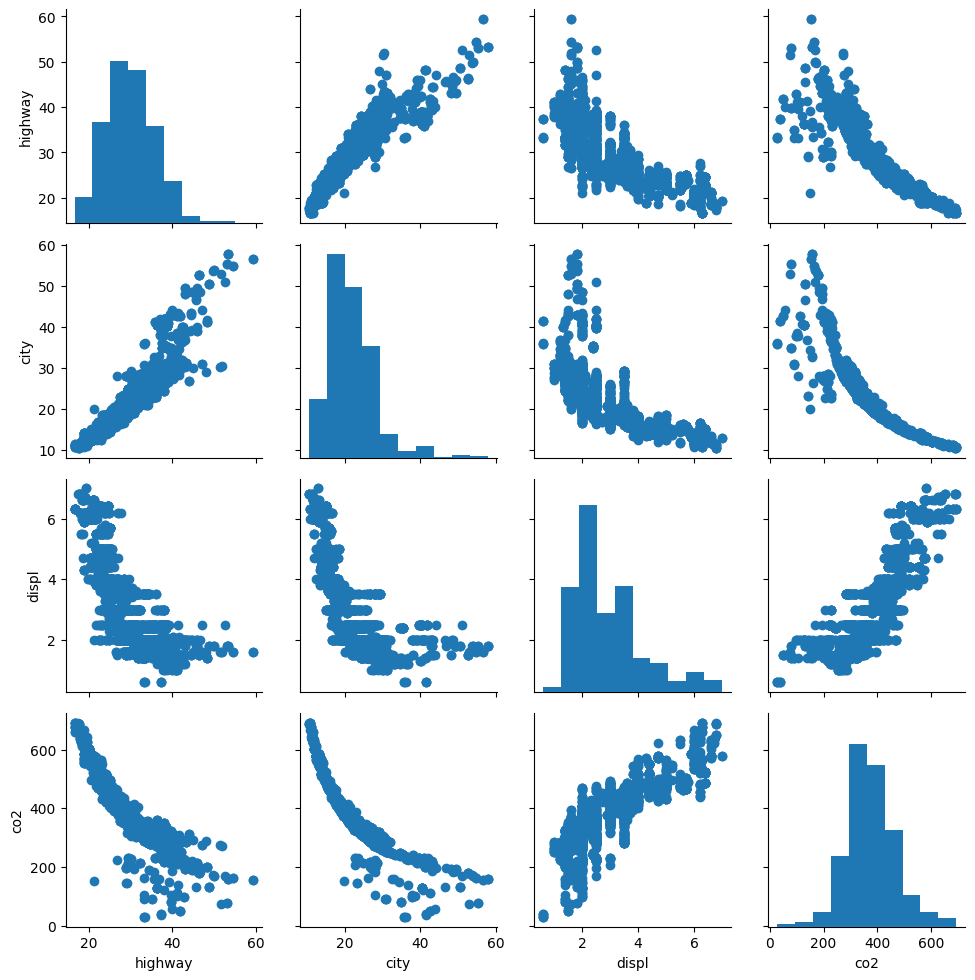

In [4]:
# Plot Matrix: fuel efficiency stats
stats = ['highway', 'city', 'displ', 'co2']
g = sns.PairGrid(data=df, vars=stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

So each row and column works with a variable. Here I put a scatter plot in each cell, and the diagonal has a histogram of that variable. This makes it easier to compare various combinations of variables.

Note that there is a symmetry in a PairGrid, with x and y axes flipped across the diagonal.

## Correlation matrix

Another useful thing common in analysis is plotting a correlation matrix. We do this by first extracting the correlation from the data framce, and then dropping this into a heatmap.

This shows that city and highway mpg is highly correlated - not shocking. Also is that engine size and emissions are highly correlated, which is expected. Fuel efficiency and engine size, and therefore co2 emissions are highly anti-correlated.

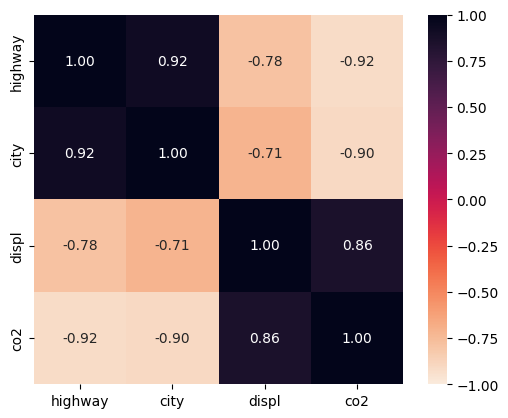

In [5]:
# Correlations Heatmap
sns.heatmap(df[stats].corr(), cmap='rocket_r', annot=True,
          fmt='.2f', vmin=-1, square=True);